### In this jupyter notebook, we will discover how to convert an image 128x128 into quantum circuit using NEQR model.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
from qiskit import execute, transpile
from qiskit.circuit import ClassicalRegister, QuantumCircuit, QuantumRegister
from qiskit.providers.aer.backends import AerSimulator
from qiskit.visualization import plot_histogram
from qiskit.quantum_info import DensityMatrix, state_fidelity, partial_trace
from skimage import data
from skimage.color import rgb2gray
from skimage.transform import resize
from skimage import io
import imageio as iio
from neqr import NEQR

In [2]:
image_neqr = NEQR()
shots = 8192
backend = AerSimulator()

In [3]:
qubits_idx = QuantumRegister(size=2, name="qubits_idx")
intensity = QuantumRegister(size=8, name="intensity")
bits_idx = ClassicalRegister(size=2, name="bits_idx")
bits_intensity = ClassicalRegister(size=8, name="bits_intensity")

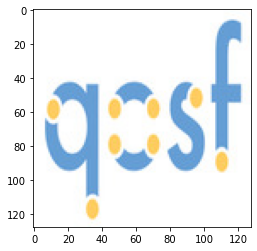

In [4]:
qosf = iio.imread('qosf (1).jpg')
plt.imshow(qosf)

gray_qosf = rgb2gray(qosf)

qc_gray = QuantumCircuit(intensity, qubits_idx, bits_intensity, bits_idx)

qc_gray= image_neqr.image_quantum_circuit(image=gray_qosf, measurements=True)


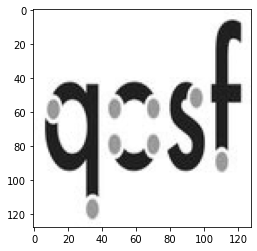

In [5]:
plt.imshow(gray_qosf, cmap="gray")
plt.show()

NEQR inverse: from the Qcricuit to image


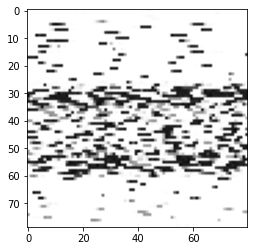

In [6]:
counts_total = execute(experiments=qc_gray, backend=backend, shots=shots).result().get_counts()

print("NEQR inverse: from the Qcricuit to image")
im=image_neqr.reconstruct_image_from_neqr_result(counts_total, (79,80))
plt.gray()
plt.imshow(im)
plt.show()